# Star Seer: Restaurant Forecast Performance

## 1. Business Understanding

In this notebook I Built a restaurant value forecast model from online text reviews for smart investments decisions

## 2. Data Collection

We will collect data from the Data yelp Source

## 3. Exploring and preparing the data

In the first step, we should import the required libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.decomposition import NMF
np.random.seed(2018)


rcParams['figure.figsize'] = 12, 4
#import warnings
#warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



### 3.a Load the data and create a data frame

In [2]:
business=pd.read_csv("/Users/paula/Desktop/yelpDataSetCSV/yelp_business.csv")

In [3]:
photosInf = pd.read_json('/Users/paula/Desktop/yelp_photos/yelp_academic_dataset_photo.json', lines = True)

In [4]:
allReviews=pd.read_csv("/Users/paula/Desktop/yelpDataSetCSV/yelp_review.csv")

allReviews.shape (5261668, 10)

In [5]:
reviews=allReviews
reviews['review_length'] = reviews.text.map(len)


In [6]:
maxOfCities=500
id_with_count = allReviews['business_id'].value_counts()
training_business_ids = id_with_count.head(maxOfCities)

### 3.b Feature extraction. Bag of words for each restaurant

In [7]:
counts_current = {}
counts_future = {}
big_reviews = {}
rating_current = {}
rating_future = {}
bussiness_idArray=[]
df2Save= pd.DataFrame(columns=['business_id','city','currentRating','futureRating','improvement','name','latitude','longitude','state','photo_id','improvementPred'])

for i,business_id in enumerate(training_business_ids.to_dict()):
    print(i,business_id)
    
    start_date  = '2010-01-01'
    end_date = '2012-01-01'
    reviewSet_current=allReviews.loc[(allReviews['date'] > start_date) & (allReviews['date'] < end_date ) & (allReviews['business_id']==business_id)]
    text_dict_current = reviewSet_current['text'].to_dict()
    
    # Skip if too few reviews
    if len(text_dict_current.values()) < 5:
        continue

    # Future average rating
    start_date  = '2012-01-01'
    end_date = '2013-01-01'
    reviewSet_future =allReviews.loc[(allReviews['date'] > start_date) & (allReviews['date'] < end_date ) & (allReviews['business_id']==business_id)]
    text_dict_future = reviewSet_future['text'].to_dict()
    
    # Skip if too few reviews
    if len(text_dict_future.values()) < 5:
        continue
    df2Save.loc[i,['business_id']]=business_id
    df2Save.loc[i,['city']]=list(business.loc[business['business_id'] == business_id].city)
    df2Save.loc[i,['name']]=list(business.loc[business['business_id'] == business_id].name)
    
    df2Save.loc[i,['latitude']]=list(business.loc[business['business_id'] == business_id].latitude)
    df2Save.loc[i,['longitude']]=list(business.loc[business['business_id'] == business_id].longitude)
    df2Save.loc[i,['state']]=list(business.loc[business['business_id'] == business_id].state)
    photoInfCity = photosInf.loc[photosInf['business_id'] == business_id]
    photo_id=np.array(photoInfCity.photo_id)
    try:
        im = Image.open('/Users/paula/Desktop/yelp_photos/yelp_academic_dataset_photos/' + str(photo_id[0]) + '.jpg')
        df2Save.loc[i,['photo_id']]=str(photo_id[0]) + '.jpg'
    except:
        df2Save.loc[i,['photo_id']]='Picture1.jpg' 

    
    # Future average rating
    stars = reviewSet_future['stars'].to_dict()
    stars = np.array(list(stars.values()))
    rating_future[business_id] = np.mean(stars)
    df2Save.loc[i,['futureRating']]=np.mean(stars)
    futureRatingTmp=np.mean(stars)
    #print(rating_current[business_id], rating_future[business_id])
    
    # Concatenate reviews from time period into one big review
    big_review = ''
    for text in text_dict_current.values():
        big_review += text
        big_review += ' '
    big_reviews[business_id] = big_review
    
    # Current average rating
    stars = reviewSet_current['stars'].to_dict()
    stars = np.array(list(stars.values()))
    rating_current[business_id] = np.mean(stars)
    df2Save.loc[i,['currentRating']]=np.mean(stars)
    currentRatingTmp=np.mean(stars)
    
    improvement=futureRatingTmp-currentRatingTmp
    improvement=improvement>0
    improvement
    df2Save.loc[i,['improvement']]=improvement
    
    counts_current[business_id] = len(text_dict_current.values())
    counts_future[business_id] = len(text_dict_future.values())

    
    
    


0 4JNXUYY8wbaaDmk3BPzlWw
1 RESDUcs7fIiihp38-d6_6g
2 K7lWdNUhCbcnEvI0NhGewg
3 cYwJA2A6I12KNkm2rtXd5g
4 DkYS3arLOhA8si5uUEmHOw
5 f4x1YBxkLrZg652xt2KR5g
6 2weQS-RnoOBhb1KsHKyoSQ
7 KskYqH1Bi7Z_61pH6Om8pg
8 eoHdUeQDNgQ6WYEnP2aiRw
9 ujHiaprwCQ5ewziu0Vi9rw
10 SMPbvZLSMMb7KU76YNYMGg
11 5LNZ67Yw9RD6nf4_UhXOjw
12 iCQpiavjjPzJ5_3gPD5Ebg
13 AV6weBrZFFBfRGCbcRGO4g
14 rcaPajgKOJC2vo_l3xa42A
15 El4FC8jcawUVgw_0EIcbaQ
16 FaHADZARwnY4yvlvpnsfGA
17 hihud--QRriCYZw1zZvW4g
18 Wxxvi3LZbHNIDwJ-ZimtnA
19 7sPNbCx7vGAaH7SbNPZ6oA
20 g8OnV26ywJlZpezdBnOWUQ
21 XZbuPXdyA0ZtTu3AzqtQhg
22 u_vPjx925UPEG9DFOAAvFQ
23 OETh78qcgDltvHULowwhJg
24 MpmFFw0GE_2iRFPdsRpJbA
25 na4Th5DrNauOv-c43QQFvA
26 P7pxQFqr7yBKMMI2J51udw
27 XXW_OFaYQkkGOGniujZFHg
28 eAc9Vd6loOgRQolMXQt6FA
29 BLIJ-p5wYuAhw6Pp6mh6mw
30 HhVmDybpU7L50Kb5A0jXTg
31 yfxDa8RFOvJPQh0rNtakHA
32 3kdSl5mo9dWC4clrQjEDGg
33 QJatAcxYgK1Zp9BRZMAx7g
34 5iSmZO0SrKU6EoXK_1M8Kw
35 o7AiTlyWUrBSzdz6oMHj5w
36 YJ8ljUhLsz6CtT_2ORNFmg
37 NvKNe9DnQavC9GstglcBJQ
38 RwMLuOkImBIqqYj4SSK

308 0d0i0FaJq1GIeW1rS2D-5w
309 S-oLPRdhlyL5HAknBKTUcQ
310 364hhL5st0LV16UcBHRJ3A
311 ejaUQ1hYo7Q7xCL1HdPINw
312 7tNY4BYLA4laqWNV4IWGQg
313 j2bx_ctb_ED3zbfSaqhQmQ
314 XmsBtCykUtObXg4Q1mYpvg
315 J1RDyyPxhioqm8c_fi4P4Q
316 OKZkEXzJt0XIamHRRTX-8g
317 64dfRmMmUsOdLnkBOtzp4w
318 0_aeYE2-VbsZts_UpILgDw
319 ebTvBxSStI9Vf5Tpux_X3Q
320 PbyqDJf815zRn-7p6vYpAQ
321 e4NQLZynhSmvwl38hC4m-A
322 RNi6tW22UMgHwWLAb0mYdA
323 DzKl51tivGJMLiNsQqf38w
324 zcScEL0WEdFkROcnz5379g
325 dEAk-gE-5Q95a7p91gNn8A
326 zU9w_xRlQSRIYXxGo-HSOA
327 GHS1rVjO-RMcRB6WJLpCDQ
328 -FLnsWAa4AGEW4NgE8Fqew
329 y7Js-07RF8d3N_AEtaw2VQ
330 Lz6QUlFkVKtnzSISk0WUPw
331 SurnOSM2bVVN4-Js3G23RQ
332 ItqPtxnayraXSlBS0EMOgg
333 WpI5MZC3XzlTpcUOKXzCbA
334 46Ld9Qc9nAx_A0jwclNZiw
335 DbEszO3wk1xVmN3pCPob2g
336 LYWbyu1EQM2o5hwHG5_Ldg
337 XnJeadLrlj9AZB8qSdIR2Q
338 uBdYMY6a6A7FyxzTSwOiDg
339 umXvdus9LbC6oxtLdXelFQ
340 _ZfjpSEO5ntk-1hbnwCR4g
341 RwRNR4z3kY-4OsFqigY5sw
342 N5B7OBTyNGgwU_Y2fwNcyw
343 svdEhLmNmpVaIv1WLtoOvQ
344 u-67zd1ImTv3EEr5kIdWrA
3

In [8]:
#df2Save=pd.read_pickle('/Users/paula/Desktop/SaveVariablesDemo/dfInfo.pkl')
#textValues=np.load('/Users/paula/Desktop/SaveVariablesDemo/textValues.npy')



### 3.c Preprocessing NLP

In [9]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer

textValues = np.array(list(big_reviews.values()))
#np.save('/Users/paula/Desktop/SaveVariablesDemo/textValues',textValues)

#textValues=np.load('/Users/paula/Desktop/SaveVariablesDemo/textValues.npy')

# additional stopwords
extra_words = ['ve', 'like', 'got', 'Cleveland', 'just', 
               'don', 'really', 'said', 'told', 'ok',
               'came', 'went', 'did', 'didn', 'good']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_words)

# Create a vectorizer object to generate term document counts
tfidf = TfidfVectorizer(stop_words=stop_words, min_df=2, max_df=0.95, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')
#min_df=2, max_df=0.95
# Replace some words
dicty = {'pizzas':'pizza', 'burgers':'burger', 'ordered':'order',
         'prices':'price', 'topping':'toppings'}
def replace_words(text, dicty):
    '''Returns text with word substitutions made according
       to the passed `dicty` dictionary'''
    for i,j in dicty.items():
        text = text.replace(i,j)
    return text

textValues = [replace_words(w, dicty) for w in textValues]

# Learn tfidf matrix
#https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3
tfid_matrix_sparse = tfidf.fit_transform(textValues)


### 3.d Dimension Reduction: Collaborative Filtering NMF

In [10]:
%%time

from sklearn.decomposition import NMF

# change num_topics
num_topics = 7

nmf = NMF(n_components=num_topics,random_state=1)
W = nmf.fit_transform(tfid_matrix_sparse)
H = nmf.components_

#save W,H
np.save('/Users/paula/Desktop/SaveVariablesDemo/Wmatrix',W)
np.save('/Users/paula/Desktop/SaveVariablesDemo/Hmatrix',H)




CPU times: user 2.41 s, sys: 99.6 ms, total: 2.51 s
Wall time: 1.56 s


 ### 3.e Dimension Reduction: Topic Modeling

In [11]:
def display_topics(model, feature_names, num_topics, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < num_topics:
            print("{:11}".format("Topic %d:" %(topic_idx)), end='')
            print(", ".join(['{:04.3f}*'.format(topic[i])+feature_names[i] \
                             for i in topic.argsort()[:-no_top_words-1:-1]]))

no_topics = num_topics
no_top_words = 5

print('Top topics + words for reviews')
print('-'*39)
display_topics(nmf, tfidf.get_feature_names(), no_topics, no_top_words)



Top topics + words for reviews
---------------------------------------
Topic 0:   0.560*restaurant, 0.555*steak, 0.526*vegas, 0.408*salad, 0.406*wine
Topic 1:   0.784*hotel, 0.599*rooms, 0.538*vegas, 0.460*pool, 0.459*casino
Topic 2:   1.390*buffet, 0.438*buffets, 0.410*crab, 0.370*legs, 0.309*vegas
Topic 3:   1.303*sushi, 0.364*rolls, 0.340*ayce, 0.282*roll, 0.190*tuna
Topic 4:   0.931*breakfast, 0.485*pancakes, 0.466*eggs, 0.342*coffee, 0.320*hash
Topic 5:   0.777*tacos, 0.482*mexican, 0.411*taco, 0.372*salsa, 0.252*asada
Topic 6:   1.059*burger, 0.515*fries, 0.266*beer, 0.194*cheese, 0.177*shake


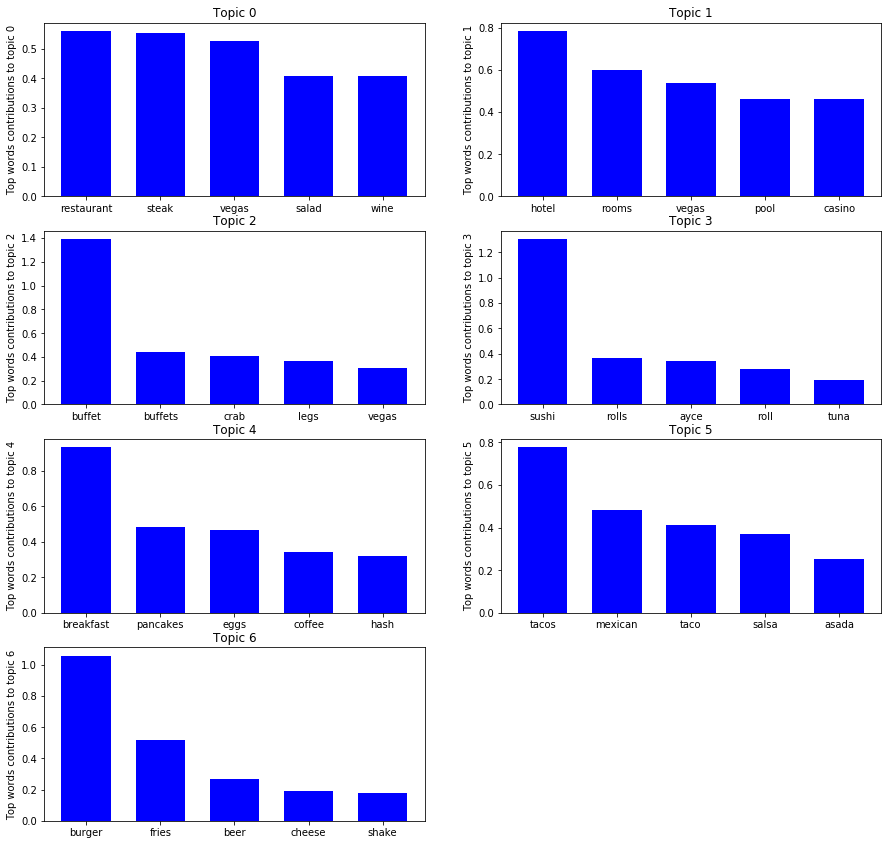

In [12]:
feature_names=tfidf.get_feature_names()
fiz=plt.figure(figsize=(15,30))
for x in range(0, no_topics):
    v=nmf.components_[x].argsort()[:-no_top_words-1:-1]
    l=[]
    dfFeature_names=pd.DataFrame(feature_names)
    dfFeature_names=dfFeature_names.loc[v]
    for i, element in enumerate(v):
        l.append(nmf.components_[x][element])
    
    plt.subplot(8,2,x+1)
    dfc=pd.DataFrame(l)
    #print(dfFeature_names[0])
    width = 1/1.5
    plt.title('Topic' + ' ' + str(x))
    plt.bar(dfFeature_names[0],dfc[0],width ,color="blue")
    plt.ylabel('Top words contributions to topic' + ' '+ str(x))

## Step 4: Trainning a model

### Try different classification techniques

We'll start by testing a variety of algorithms using scikit-learns's gridsearch method for model optimization. Our models will include both parametric (e.g. SVM) and non-parametric (e.g. KNN) and linear (e.g. Logistic Regression) and nonlinear modles (e.g. Random Forest Classifier).

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import roc_auc_score

In [14]:
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)
clf_F = svm.SVR(kernel='poly', degree=2)
clf_E = LinearRegression()
clf_G = LogisticRegression(random_state=0)
clf_H = svm.SVC(kernel='poly', degree=2)



In [15]:
clf = clf_C
# y=0 when rating decreases, y=1 when increases
y = np.array(list(rating_current.values()))-np.array(list(rating_future.values()))
y = y<0
print(sum(y), 'out of ', len(y), ' are decreasing')


173 out of  363  are decreasing


Accuracy:  0.589041095890411
Precision:  0.5641025641025641
Recall:  0.6285714285714286
F1 Score:  0.5945945945945945
Confusion Matrix: 
 [[21 17]
 [13 22]]

### 4.a Model Evaluation 

Accuracy:  0.5753424657534246
Precision:  0.5319148936170213
Recall:  0.7352941176470589
F1 Score:  0.617283950617284
Confusion Matrix: 
 [[17 22]
 [ 9 25]]


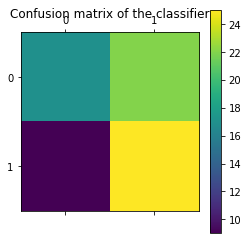

In [17]:
X_train, X_test, y_train, y_test = train_test_split(W, y, test_size = 0.2, random_state = 1)
   
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#y_pred = np.random.randint(2, size=y_pred.shape)
#y_pred = np.ones(y_pred.shape, dtype=int)

print('Accuracy: ',clf.score(X_test,y_test))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()

Accuracy:  0.589041095890411
Precision:  0.5609756097560976
Recall:  0.6571428571428571
F1 Score:  0.605263157894737
Confusion Matrix: 
 [[20 18]
 [12 23]]

In [ ]:
yTotalPred=clf.predict(W)


In [ ]:
#Compute Positive and negative NMF
df2Save['improvementPred'] = yTotalPred

In [ ]:
df2Save.head(1)

In [ ]:
#textValuesPos = textValues[np.array(yTotalPred)]
yTotalPred=np.array(list(df2Save['improvement']))
textValuesNp = np.array(textValues)
textValuesPos = textValuesNp[yTotalPred]
textValuesNeg = textValuesNp[yTotalPred==False]
len(textValuesNeg)


In [ ]:
#Save data Frame
df2Save.to_pickle("/Users/paula/Desktop/SaveVariablesDemo/dfInfo.pkl")

In [ ]:
# additional stopwords
extra_words = ['ve', 'like', 'got', 'Cleveland', 'just', 
               'don', 'really', 'said', 'told', 'ok',
               'came', 'went', 'did', 'didn', 'good']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_words)

# Create a vectorizer object to generate term document counts
tfidfpos = TfidfVectorizer(stop_words=stop_words, min_df=2, max_df=0.95, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')
tfidfneg = TfidfVectorizer(stop_words=stop_words, min_df=2, max_df=0.95, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')
#min_df=2, max_df=0.95
# Replace some words
dicty = {'pizzas':'pizza', 'burgers':'burger', 'ordered':'order',
         'prices':'price', 'topping':'toppings'}
def replace_words(text, dicty):
    '''Returns text with word substitutions made according
       to the passed `dicty` dictionary'''
    for i,j in dicty.items():
        text = text.replace(i,j)
    return text

textValuesPos = [replace_words(w, dicty) for w in textValuesPos]
textValuesNeg = [replace_words(w, dicty) for w in textValuesNeg]

# Learn tfidf matrix
#https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3
tfid_matrix_sparse_pos = tfidfpos.fit_transform(textValuesPos)
tfid_matrix_sparse_neg = tfidfneg.fit_transform(textValuesNeg)



In [ ]:
# NMFpos ; NMFneg
from sklearn.decomposition import NMF

# change num_topics
num_topics = 7

nmf_pos = NMF(n_components=num_topics,random_state=1)
W_pos = nmf_pos.fit_transform(tfid_matrix_sparse_pos)
H_pos = nmf_pos.components_

nmf_neg = NMF(n_components=num_topics,random_state=1)
W_neg = nmf_neg.fit_transform(tfid_matrix_sparse_neg)
H_neg = nmf_neg.components_

#save W,H
np.save('/Users/paula/Desktop/SaveVariablesDemo/W_pos',W_pos)
np.save('/Users/paula/Desktop/SaveVariablesDemo/H_pos',H_pos)

np.save('/Users/paula/Desktop/SaveVariablesDemo/W_neg',W_neg)
np.save('/Users/paula/Desktop/SaveVariablesDemo/H_neg',H_neg)



In [ ]:
df2SaveTmp.head(20)

In [ ]:
df2SaveTmp=df2Save
df2SaveTmp['TopWord'] = 0
df2SaveTmp['TopWeight'] = 0
df2SaveTmp['TopWord'] = df2SaveTmp['TopWord'].astype('object')
df2SaveTmp['TopWeight'] = df2SaveTmp['TopWeight'].astype('object')

indexdf=df2SaveTmp.index.values.tolist()


for index in indexdf:
    business_id=df2SaveTmp.at[index,'business_id']
    print(business_id)
    weightValues,featureNamesTops = getSpecificWordWeight(df2SaveTmp,business_id)
    df2SaveTmp.at[index,'TopWord']=featureNamesTops
    df2SaveTmp.at[index,'TopWeight']=weightValues
    
df2SaveTmp.head(10)


In [ ]:
getSpecificWordWeight(df2SaveTmp,'K7lWdNUhCbcnEvI0NhGewg')

In [ ]:
getSpecificWordWeight(df2SaveTmp,'2weQS-RnoOBhb1KsHKyoSQ')

In [ ]:
def getSpecificWordWeight(df2Save,bussiness_id):
    
    numTopics=7
    improvementBussiness=df2Save.loc[df2Save['improvement'] == True]
    degradBussiness=df2Save.loc[df2Save['improvement'] == False]
    improvementBussiness.index=range(len(improvementBussiness))
    degradBussiness.index=range(len(degradBussiness))
    print(len(degradBussiness))
    improvementBusiness=df2Save.loc[df2Save['business_id'] == bussiness_id].improvement
    if(np.array( improvementBusiness)==1):
        improvementBussinessIndex=improvementBussiness.index[improvementBussiness['business_id'] == bussiness_id]
        print(improvementBussinessIndex[0])
        l=np.transpose(W_pos[improvementBussinessIndex[0]])
        l=np.reshape(l,(1,numTopics))
        result=np.matmul(l,H_pos)
        sortedIndices=np.argsort(result).squeeze()
        topIndices=sortedIndices[:-10-1:-1]
        featureNames=np.array(tfidfpos.get_feature_names())
        featureNamesTops=featureNames[topIndices]
        weightValues=result[0,topIndices]
        #print(featureNamesTops)
        featureNames=np.array(tfidfpos.get_feature_names())
        featureNamesTops=featureNames[topIndices]
        #print(featureNamesTops)
        
    else:
        degradBussinessIndex=degradBussiness.index[degradBussiness['business_id'] == bussiness_id]
        print(W_neg.shape)
        
        l=np.transpose(W_neg[degradBussinessIndex[0]])
        l=np.reshape(l,(1,numTopics))
        result=np.matmul(l,H_neg)
        sortedIndices=np.argsort(result).squeeze()
        topIndices=sortedIndices[:-10-1:-1]
        featureNames=np.array(tfidfneg.get_feature_names())
        featureNamesTops=featureNames[topIndices]
        weightValues=result[0,topIndices]
        
        featureNames=np.array(tfidfneg.get_feature_names())
        featureNamesTops=featureNames[topIndices]
        #print(featureNamesTops)
       
        
    return weightValues,featureNamesTops
  

In [ ]:
df2SaveTmp.to_pickle("/Users/paula/Desktop/SaveVariablesDemo/df2SaveTmp.pkl")

In [ ]:
#Topic Contributions of Restaurants that will decrease
#Topic Contributions of Restaurants that will improve
import sklearn
wnorm=sklearn.preprocessing.normalize(W,norm='l1')

yimp = np.array(list(rating_current.values()))-np.array(list(rating_future.values()))
yimp=yimp>0
indexImpro=np.where(yimp==True)
tt=wnorm[list(np.array(indexImpro))]
negTopicCont=tt.mean(0)

yimp = np.array(list(rating_current.values()))-np.array(list(rating_future.values()))
yimp=yimp>0
indexImpro=np.where(yimp==False)
tt=wnorm[list(np.array(indexImpro))]
posTopicCont=tt.mean(0)

In [ ]:
#Plot Topic Contributions of Restaurants that will decrease
#Plot Topic Contributions of Restaurants that will improve

N = num_topics

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, negTopicCont, width, label='Improve',color='g')
plt.bar(ind + width, posTopicCont, width,
    label='Decrease',color='r')

plt.ylabel('Average Topic Weights',fontsize=14)
plt.title('Topic Contributions',fontsize=14)

plt.xticks(ind + width / 2, ('Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4','Topic 5','Topic 6'))
plt.legend(loc='best')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()
 
